In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


In [13]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')


In [14]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
dataset.shape

(200, 5)

In [16]:
X = dataset.iloc[:, [3, 4]].values

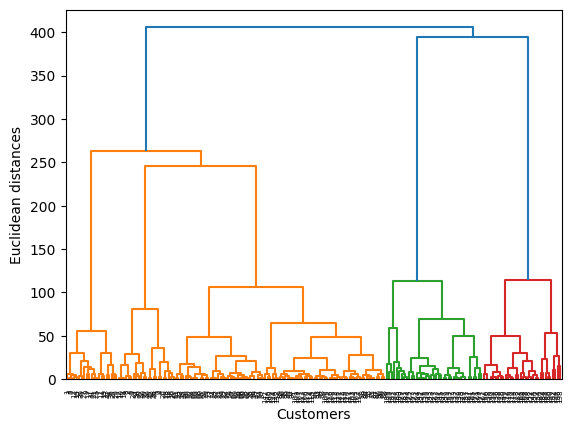

In [17]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The x-axis contains the Customers and y-axis represents the distance between these samples. The vertical line with maximum distance threshold of 200 and cut the dendrogram:

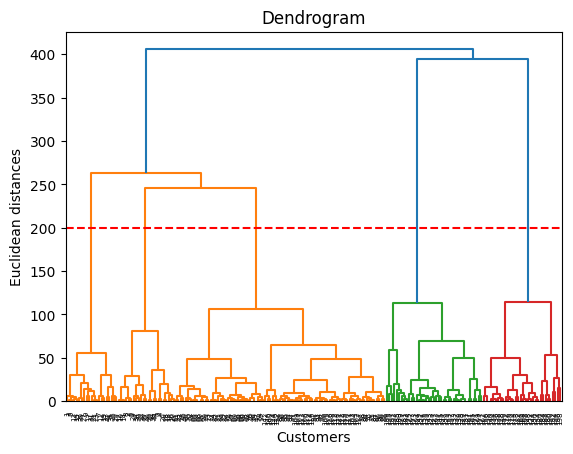

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=200, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We have five clusters as this line cuts the dendrogram at five points. Let’s now apply hierarchical clustering for 5 clusters:

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

In [ ]:
# GMM
gmm = GaussianMixture(n_components=5, random_state=0)
gmm_labels = gmm.fit_predict(X)

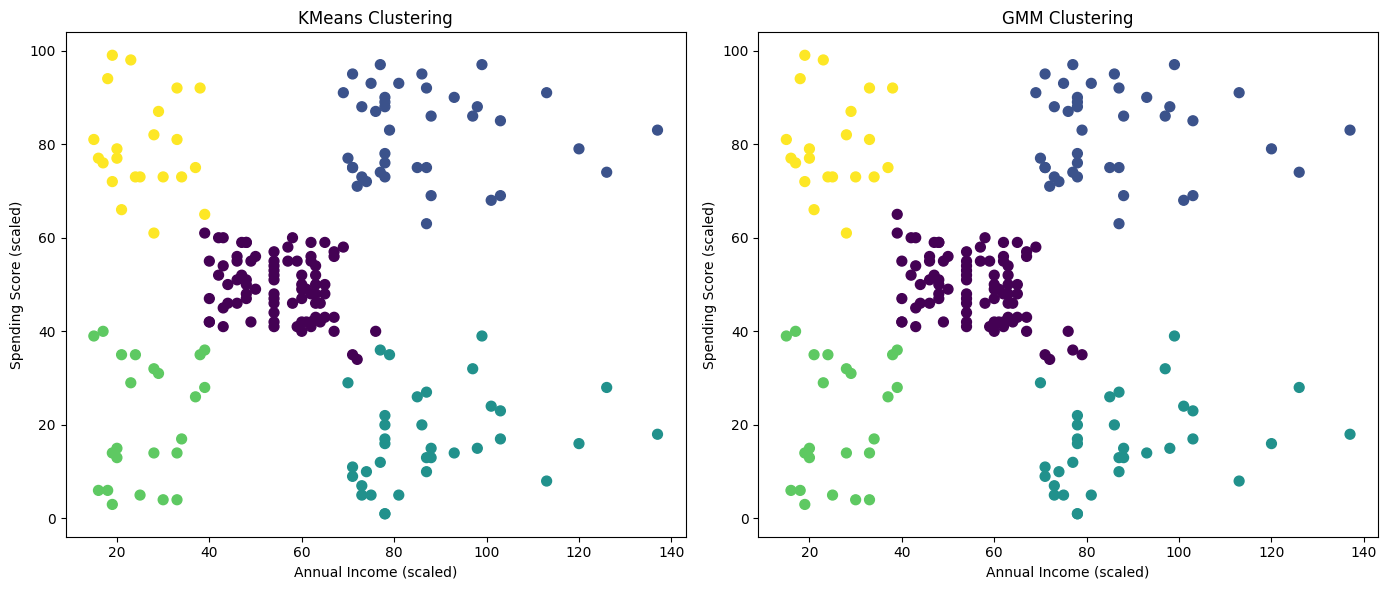

In [ ]:
# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('Annual Income (scaled)')
axs[0].set_ylabel('Spending Score (scaled)')
axs[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=50)
axs[1].set_title('GMM Clustering')
axs[1].set_xlabel('Annual Income (scaled)')
axs[1].set_ylabel('Spending Score (scaled)')
plt.tight_layout()
plt.show()

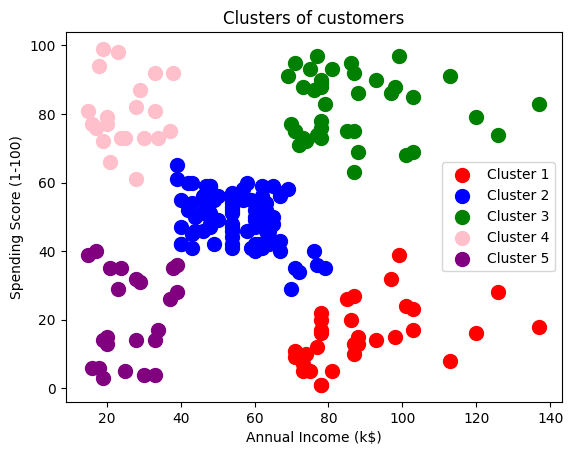

In [22]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()